In [43]:
import pandas as pd
import numpy as np 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow as tf

from tensorflow.keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

import seaborn as sns
import os
import scipy.io

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/CAPSTONE_PROJECT/Annotations.zip > /dev/null
!unzip /content/drive/MyDrive/CAPSTONE_PROJECT/Car+Images.zip > /dev/null

In [59]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        validation_split=0.2,
        rescale=1./255, # converting to floating points
        shear_range=0.2,
        zoom_range=0.2,
        brightness_range=(0.3, 0.7),
        horizontal_flip=True,
        vertical_flip=False, # cars can't be inverted so its False, medical images it makes sense for it to be True
        fill_mode='constant') # constant adds a black shadow which is good for object detection


# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        '/content/Car Images/Train Images',  
        target_size=(224, 224),  
        batch_size=batch_size,
        # interpolation='bicubic',
        subset='training',
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        '/content/Car Images/Test Images',
        target_size=(224, 224),
        batch_size=batch_size,
        # interpolation='bicubic',
        subset='validation',
        class_mode='categorical')

Number_Of_Training_Images = train_generator.classes.shape[0]
steps_per_epoch = Number_Of_Training_Images/batch_size

Found 6598 images belonging to 196 classes.
Found 1524 images belonging to 196 classes.


In [61]:
model = Sequential()

pretrained_model = ResNet50(
                   include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   classes=196,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(196, activation='softmax'))

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               1049088   
                                                                 
 dense_17 (Dense)            (None, 196)               100548    
                                                                 
Total params: 24,737,348
Trainable params: 1,149,636
Non-trainable params: 23,587,712
_________________________________________________________________


In [62]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(train_generator, epochs = 2, 
                    batch_size = batch_size,
                    validation_data = validation_generator,
                    steps_per_epoch = steps_per_epoch)
# batch size = 32, dense layer = 512

Epoch 1/2
206/206 [==============================] - 181s 871ms/step - loss: 5.2749 - accuracy: 0.0083 - val_loss: 5.2736 - val_accuracy: 0.0085
Epoch 2/2
206/206 [==============================] - 176s 852ms/step - loss: 5.2748 - accuracy: 0.0083 - val_loss: 5.2734 - val_accuracy: 0.0085


In [50]:
history = model.fit(train_generator, epochs = 2, 
                    batch_size = batch_size,
                    validation_data = validation_generator,
                    steps_per_epoch = steps_per_epoch)
# batch size = 16, dense layer = 512

Epoch 1/2
206/206 [==============================] - 189s 919ms/step - loss: 5.2747 - accuracy: 0.0083 - val_loss: 5.2733 - val_accuracy: 0.0085
Epoch 2/2
206/206 [==============================] - 178s 861ms/step - loss: 5.2745 - accuracy: 0.0083 - val_loss: 5.2731 - val_accuracy: 0.0085


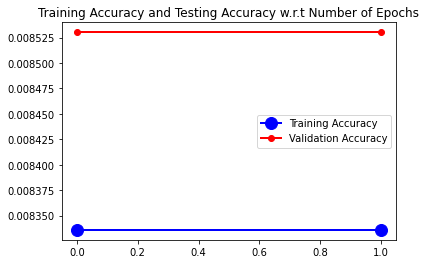

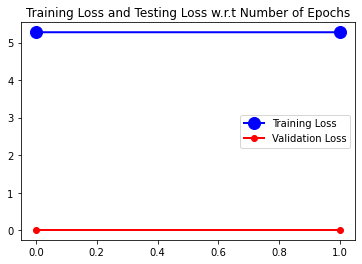

In [51]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
No_Of_Epochs = range(2)

plt.plot(No_Of_Epochs, train_acc, marker = 'o', color = 'blue', markersize = 12, linewidth = 2, label = 'Training Accuracy')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12,linewidth = 2, label = 'Validation Accuracy')

plt.title('Training Accuracy and Testing Accuracy w.r.t Number of Epochs')
plt.legend()
plt.figure()

plt.plot(No_Of_Epochs, train_loss, marker = 'o', color = 'blue', markersize = 12, linewidth = 2, label = 'Training Loss')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, linewidth = 2, label = 'Validation Loss')

plt.title('Training Loss and Testing Loss w.r.t Number of Epochs')
plt.legend()

plt.show()

In [54]:
history = model.fit(train_generator, epochs = 2, 
                    batch_size = batch_size,
                    validation_data = validation_generator,
                    steps_per_epoch = steps_per_epoch)
# dense layer increased = 1024

Epoch 1/2
206/206 [==============================] - 185s 881ms/step - loss: 5.3202 - accuracy: 0.0055 - val_loss: 5.2773 - val_accuracy: 0.0085
Epoch 2/2
206/206 [==============================] - 175s 852ms/step - loss: 5.2782 - accuracy: 0.0083 - val_loss: 5.2766 - val_accuracy: 0.0085


In [55]:
history = model.fit(train_generator, epochs = 2, 
                    batch_size = batch_size,
                    validation_data = validation_generator,
                    steps_per_epoch = steps_per_epoch)
# dense layer decreased = 256

Epoch 1/2
206/206 [==============================] - 174s 844ms/step - loss: 5.2774 - accuracy: 0.0083 - val_loss: 5.2759 - val_accuracy: 0.0085
Epoch 2/2
206/206 [==============================] - 175s 848ms/step - loss: 5.2770 - accuracy: 0.0083 - val_loss: 5.2753 - val_accuracy: 0.0085


In [58]:
history = model.fit(train_generator, epochs = 2, 
                    batch_size = batch_size,
                    validation_data = validation_generator,
                    steps_per_epoch = steps_per_epoch)
# dense layer decreased = 128

Epoch 1/2
206/206 [==============================] - 188s 893ms/step - loss: 5.2881 - accuracy: 0.0061 - val_loss: 5.2772 - val_accuracy: 0.0085
Epoch 2/2
206/206 [==============================] - 176s 853ms/step - loss: 5.2783 - accuracy: 0.0082 - val_loss: 5.2765 - val_accuracy: 0.0085


In [63]:
history = model.fit(train_generator, epochs = 2, 
                    batch_size = batch_size,
                    validation_data = validation_generator,
                    steps_per_epoch = steps_per_epoch)
# activation = softmax, dense layer - 512

Epoch 1/2
206/206 [==============================] - 184s 871ms/step - loss: 5.3050 - accuracy: 0.0055 - val_loss: 5.2773 - val_accuracy: 0.0085
Epoch 2/2
206/206 [==============================] - 176s 855ms/step - loss: 5.2784 - accuracy: 0.0077 - val_loss: 5.2765 - val_accuracy: 0.0085
